# Final Capstone Project

## Introduction

This problem seems very interesting as we need to take care of multiple parameters into account for selecting any neighborhood region. As a person I would prefer the region where I would go is more familiar to me, or within a week it should be second homeplace to me. There are many primary things to consider here like, demographics of region like weather conditions, clock time difference, food and culture, some government data about how favored it was in past. But these things are just for so called secondary thing which is business idea. <br><br>
Usually, citizens prefer places with moderate climate situation, having historical sites, city which is more similar to New York city (considering American Citizen), city having variety of restaurants like continental, sub-continental, language preferably English. So, for a guy living in New York city, if they want some outing so preferable locations might be Bangkok, Tokyo.<br><br>
Some important points:<br><br>
 • People prefer language and culture most according to me.<br>
 • Worldwide reputation of the city also important, say ease of doing business ranking.<br>
 • How similar the location is when compared to their native place.<br>
 • Different tourists’ attractions and sites to visit in that place.<br>
 • Budget.<br>

#### Importing Basic libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests

#### Importing Libraries required particulaly for this project

In [8]:
import folium 
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML  
from pandas.io.json import json_normalize

## Data Gathering

I used data of all the above-mentioned cities, and used various techniques as listed in project itself to explore venues at each place. Also, data cleaning and selection is performed to narrow down the search space and get more accurate result. So, I listed out proposed steps below:<br><br>
 -• I will be using Dataset which contain all the required geographical data about New York City.<br>
 -• To be more specific I am using 'Borough', 'Neighborhood', 'Latitude', and ‘Longitude’ kind of fields in dataset. The dataset is already gathered in week 3 of this course but need few fine tunings.<br>
 -• Geo-coordinates of districts will be obtained with the help of the geo-coder tool in the notebook.<br>
 -• Counting the occurrence of venues in each city and collected them all in one dataset so that we can see frequency of each place. Then we calculate the probability of each venue and make clustering to find the similar cities.<br>

#### Foursquare credentials, please enter yours

In [9]:
ID = '----' # your Foursquare ID
SECRET = '-----' # your Foursquare Secret
ACCESS_TOKEN = '----' # your FourSquare Access Token
VERSION = '---'
LIMIT = 30

In [10]:
search_query = 'Asian'
radius = 500

#### Getting Data Required for analysis

In [1]:
df=[]
cities = ['Bangkok','Tokyo','New York City']
for city in cities:
    address = city
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
   
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(ID, SECRET, latitude, longitude, VERSION, radius, LIMIT)
    
    results = requests.get(url).json()
    results.keys()
    results['response'].keys()
    items = results['response']['groups'][0]['items']
   
    df.append(pd.json_normalize(items))

In [15]:
df

[                         referralId  reasons.count  \
 0    e-0-5010afc9e4b090757f48c99a-0              0   
 1    e-0-4b0587f9f964a52001aa22e3-1              0   
 2    e-0-4c029d3c302295213c6fde81-2              0   
 3    e-0-4ceb69b1d27560fca3439b3a-3              0   
 4    e-0-4d9bdddd7ae5548198a34174-4              0   
 5    e-0-50dfa3fbe4b0eb1fe51ec7ef-5              0   
 6    e-0-4d20393a0901721e6ffc90a5-6              0   
 7    e-0-4bb04db0f964a52057403ce3-7              0   
 8    e-0-4bda4a3e3904a593c40d469e-8              0   
 9    e-0-4f83c20ce4b0443298bee012-9              0   
 10  e-0-4b8a06e7f964a520545c32e3-10              0   
 11  e-0-530f18ed498e27ad09ba8272-11              0   
 12  e-0-548edbfd498e2d4a137c8c1c-12              0   
 13  e-0-55002446498e94585e4c98e5-13              0   
 14  e-0-55f025a4498e38c02aac273d-14              0   
 15  e-0-5493fcff498ecc2164b93e85-15              0   
 16  e-0-4b0587fcf964a520e8aa22e3-16              0   
 17  e-0-4

#### Important auxiliary functions

In [25]:
def cities(df):
    return [df[0], df[1], df[2]]

In [26]:
df_Bangkok = cities(city_data)[0]
df_tokyo = cities(city_data)[1]
df_New_York = cities(city_data)[2]
dataset = [df_Bangkok, df_tokyo, df_New_York]

## Saving dataset

In [29]:
df_Bangkok.to_csv('df_Bangkok.csv')
df_tokyo.to_csv('df_tokyo.csv')
df_New_York.to_csv('df_New_York.csv')

## Data Exploration

In [30]:
df_Bangkok.head(5)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.neighborhood
0,e-0-5010afc9e4b090757f48c99a-0,0,"[{'summary': 'This spot is popular', 'type': '...",5010afc9e4b090757f48c99a,Café VeloDome (คาเฟ่ เวโลโดม),Phra Chan Rd.,13.755757,100.492017,"[{'label': 'display', 'lat': 13.755757, 'lng':...",185,...,TH,พระนคร,กรุงเทพมหานคร,ประเทศไทย,"[Phra Chan Rd., พระนคร, กรุงเทพมหานคร 10200, ป...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN
1,e-0-4b0587f9f964a52001aa22e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b0587f9f964a52001aa22e3,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...,Na Phra Lan Rd,13.751735,100.492651,"[{'label': 'display', 'lat': 13.75173464369186...",302,...,TH,พระนคร,กรุงเทพมหานคร,ประเทศไทย,"[Na Phra Lan Rd (Maha Rat Rd), พระนคร, กรุงเทพ...","[{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...",0,[],Maha Rat Rd,NaN
2,e-0-4c029d3c302295213c6fde81-2,0,"[{'summary': 'This spot is popular', 'type': '...",4c029d3c302295213c6fde81,Thokkathan-Mother Earth Squeezing Her Hair (พร...,Ratchadamnoen Nai Rd.,13.756602,100.494767,"[{'label': 'display', 'lat': 13.75660184391025...",306,...,TH,พระนคร,กรุงเทพมหานคร,ประเทศไทย,"[Ratchadamnoen Nai Rd. (Rachini Rd.), พระนคร, ...","[{'id': '4bf58dd8d48988d131941735', 'name': 'S...",0,[],Rachini Rd.,NaN
3,e-0-4ceb69b1d27560fca3439b3a-3,0,"[{'summary': 'This spot is popular', 'type': '...",4ceb69b1d27560fca3439b3a,The Grand Palace (พระบรมมหาราชวัง),Na Phra Lan Rd,13.751814,100.491176,NaN,353,...,TH,พระนคร,กรุงเทพมหานคร,ประเทศไทย,"[Na Phra Lan Rd (Maha Rat Rd & Sanam Chai Rd),...","[{'id': '52e81612bcbc57f1066b7a14', 'name': 'P...",0,[],Maha Rat Rd & Sanam Chai Rd,NaN
4,e-0-4d9bdddd7ae5548198a34174-4,0,"[{'summary': 'This spot is popular', 'type': '...",4d9bdddd7ae5548198a34174,Prasat Phra Thep Bidon (ปราสาทพระเทพบิดร),Temple of the Emerald Buddha,13.751606,100.492720,"[{'label': 'display', 'lat': 13.751606, 'lng':...",315,...,TH,พระบรมมหาราชวัง,กรุงเทพมหานคร,ประเทศไทย,"[Temple of the Emerald Buddha, พระบรมมหาราชวัง...","[{'id': '52e81612bcbc57f1066b7a14', 'name': 'P...",0,[],NaN,NaN


In [31]:
df_Bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   referralId                       26 non-null     object 
 1   reasons.count                    26 non-null     int64  
 2   reasons.items                    26 non-null     object 
 3   venue.id                         26 non-null     object 
 4   venue.name                       26 non-null     object 
 5   venue.location.address           25 non-null     object 
 6   venue.location.lat               26 non-null     float64
 7   venue.location.lng               26 non-null     float64
 8   venue.location.labeledLatLngs    25 non-null     object 
 9   venue.location.distance          26 non-null     int64  
 10  venue.location.postalCode        24 non-null     object 
 11  venue.location.cc                26 non-null     object 
 12  venue.location.city     

In [32]:
df_Bangkok.describe()

,reasons.count,venue.location.lat,venue.location.lng,venue.location.distance,venue.photos.count
count,26.0,26.000000,26.000000,26.000000,26.0
mean,0.0,13.754840,100.491200,399.461538,0.0
std,0.0,0.002221,0.002408,77.092791,0.0
min,0.0,13.750489,100.488694,185.000000,0.0
25%,0.0,13.753184,100.489294,354.000000,0.0
50%,0.0,13.754995,100.490705,430.000000,0.0
75%,0.0,13.756397,100.492598,462.750000,0.0
max,0.0,13.758806,100.497171,492.000000,0.0


#### Tokyo Dataset Structure

In [33]:
df_tokyo.head(5)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.venuePage.id
0,e-0-4fa0e65fe4b03ac4daf0aa6b-0,0,"[{'summary': 'This spot is popular', 'type': '...",4fa0e65fe4b03ac4daf0aa6b,Grand Kitchen,丸の内1-1-1,パレスホテル東京 1F,35.684026,139.761426,"[{'label': 'display', 'lat': 35.6840260345373,...",...,JP,東京,東京都,日本,"[丸の内1-1-1 (パレスホテル東京 1F), 千代田区, 東京都, 100-0005, 日本]","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",0,[],NaN,NaN
1,e-0-4b05879af964a520ac9b22e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b05879af964a520ac9b22e3,Palace Hotel Tokyo (パレスホテル東京),丸の内1-1-1,NaN,35.684644,139.761302,"[{'label': 'display', 'lat': 35.684644, 'lng':...",...,JP,東京,東京都,日本,"[丸の内1-1-1, 千代田区, 東京都, 100-0005, 日本]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN
2,e-0-50837f31e4b00b2c40b542ed-2,0,"[{'summary': 'This spot is popular', 'type': '...",50837f31e4b00b2c40b542ed,Sushi Kanesaka (鮨 かねさか),丸の内1-1-1,パレスホテル東京 6F,35.684559,139.761064,"[{'label': 'display', 'lat': 35.684559, 'lng':...",...,JP,東京,東京都,日本,"[丸の内1-1-1 (パレスホテル東京 6F), 千代田区, 東京都, 100-0005, 日本]","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],NaN,NaN
3,e-0-4b7f961bf964a5208c3530e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b7f961bf964a5208c3530e3,Wadakura Fountain Park (和田倉噴水公園),皇居外苑3-1,NaN,35.683453,139.760829,"[{'label': 'display', 'lat': 35.683453, 'lng':...",...,JP,東京,東京都,日本,"[皇居外苑3-1, 千代田区, 東京都, 100-0002, 日本]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN
4,e-0-4fc05964e4b08acecb0a8fa7-4,0,"[{'summary': 'This spot is popular', 'type': '...",4fc05964e4b08acecb0a8fa7,Amber Palace (琥珀宮),丸ノ内1-1-1,パレスホテル東京 5F,35.684647,139.761458,"[{'label': 'display', 'lat': 35.68464736590314...",...,JP,東京,東京都,日本,"[丸ノ内1-1-1 (パレスホテル東京 5F), 千代田区, 東京都, 100-0005, 日本]","[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",0,[],NaN,NaN


In [34]:
df_tokyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   referralId                       30 non-null     object 
 1   reasons.count                    30 non-null     int64  
 2   reasons.items                    30 non-null     object 
 3   venue.id                         30 non-null     object 
 4   venue.name                       30 non-null     object 
 5   venue.location.address           30 non-null     object 
 6   venue.location.crossStreet       23 non-null     object 
 7   venue.location.lat               30 non-null     float64
 8   venue.location.lng               30 non-null     float64
 9   venue.location.labeledLatLngs    30 non-null     object 
 10  venue.location.distance          30 non-null     int64  
 11  venue.location.postalCode        27 non-null     object 
 12  venue.location.cc       

In [35]:
df_tokyo.describe()

,reasons.count,venue.location.lat,venue.location.lng,venue.location.distance,venue.photos.count
count,30.0,30.000000,30.000000,30.000000,30.0
mean,0.0,35.682842,139.761842,344.800000,0.0
std,0.0,0.001769,0.002388,101.493808,0.0
min,0.0,35.679185,139.756456,141.000000,0.0
25%,0.0,35.681533,139.761109,261.250000,0.0
50%,0.0,35.682650,139.761873,367.500000,0.0
75%,0.0,35.684417,139.763844,427.500000,0.0
max,0.0,35.686090,139.764533,495.000000,0.0


#### New York Dataset Structure

In [36]:
df_New_York.head(5)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.venuePage.id
0,e-0-57f0689d498e7d49d9189369-0,0,"[{'summary': 'This spot is popular', 'type': '...",57f0689d498e7d49d9189369,The Bar Room at Temple Court,123 Nassau St,40.711448,-74.006802,"[{'label': 'display', 'lat': 40.7114477287544,...",157,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-56d8c0f8498edb854f926e6a-1,0,"[{'summary': 'This spot is popular', 'type': '...",56d8c0f8498edb854f926e6a,"The Beekman, A Thompson Hotel",123 Nassau St,40.711173,-74.006702,"[{'label': 'display', 'lat': 40.7111725, 'lng'...",182,...,0,[],Beekman St,2476558,https://www.seamless.com/menu/the-bar-room-at-...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
2,e-0-4c606c3e1e5cd13ad1a1a1ed-2,0,"[{'summary': 'This spot is popular', 'type': '...",4c606c3e1e5cd13ad1a1a1ed,Alba Dry Cleaner & Tailor,140 Nassau St,40.711434,-74.006272,"[{'label': 'display', 'lat': 40.71143355866638...",145,...,0,[],Beekman and Spruce st,NaN,NaN,NaN,NaN,NaN,NaN,40218202
3,e-0-3fd66200f964a520d8f11ee3-3,0,"[{'summary': 'This spot is popular', 'type': '...",3fd66200f964a520d8f11ee3,City Hall Park,17 Park Row,40.711893,-74.007792,NaN,176,...,0,[],btwn Broadway & Centre St,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-0-53373f26498e940581c90985-4,0,"[{'summary': 'This spot is popular', 'type': '...",53373f26498e940581c90985,Gibney Dance Center Downtown,280 Broadway,40.713923,-74.005661,"[{'label': 'display', 'lat': 40.71392316324669...",136,...,0,[],Chambers St,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_New_York.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referralId                           30 non-null     object 
 1   reasons.count                        30 non-null     int64  
 2   reasons.items                        30 non-null     object 
 3   venue.id                             30 non-null     object 
 4   venue.name                           30 non-null     object 
 5   venue.location.address               30 non-null     object 
 6   venue.location.lat                   30 non-null     float64
 7   venue.location.lng                   30 non-null     float64
 8   venue.location.labeledLatLngs        29 non-null     object 
 9   venue.location.distance              30 non-null     int64  
 10  venue.location.postalCode            30 non-null     object 
 11  venue.location.cc                 

In [38]:
df_New_York.describe()

,reasons.count,venue.location.lat,venue.location.lng,venue.location.distance,venue.photos.count
count,30.0,30.000000,30.000000,30.000000,30.0
mean,0.0,40.712886,-74.007682,239.033333,0.0
std,0.0,0.001638,0.001149,64.078876,0.0
min,0.0,40.710178,-74.009686,136.000000,0.0
25%,0.0,40.711437,-74.008649,186.750000,0.0
50%,0.0,40.713030,-74.007747,242.000000,0.0
75%,0.0,40.714323,-74.006837,273.500000,0.0
max,0.0,40.715537,-74.005530,369.000000,0.0


## Data Cleaning, Preprocessing and Feature Selection

#### Intersecting dataset

In [39]:
intersect_cols = list(set.intersection(*(set(city.columns) for city in dataset)))

In [41]:
print(intersect_cols)

['venue.photos.count', 'venue.location.state', 'venue.location.crossStreet', 'venue.photos.groups', 'venue.location.lat', 'referralId', 'venue.name', 'venue.location.cc', 'venue.location.lng', 'venue.location.labeledLatLngs', 'venue.location.distance', 'venue.location.city', 'venue.location.formattedAddress', 'venue.location.country', 'venue.location.address', 'venue.location.postalCode', 'venue.location.neighborhood', 'reasons.items', 'reasons.count', 'venue.categories', 'venue.id']


In [42]:
def category_type(row):
    categories = row['categories']   
    if len(categories) == 0:
        return None
    else:
        return categories[0]['name']

#### Selecting name, categories, latitude and longitude from above

In [43]:
filtered_dataset = []
columns = ['venue.name', 'venue.categories', 'venue.location.lng','venue.location.lat']
for city in dataset:
    temp = city.loc[:,columns]
    temp.columns = [col.split('.')[-1] for col in temp.columns]
    temp['categories'] = temp.apply(category_type, axis=1)
    filtered_dataset.append(temp)
print(filtered_dataset)

[                                                 name           categories  \
0                       Café VeloDome (คาเฟ่ เวโลโดม)                 Café   
1   Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...      Buddhist Temple   
2   Thokkathan-Mother Earth Squeezing Her Hair (พร...     Spiritual Center   
3                  The Grand Palace (พระบรมมหาราชวัง)               Palace   
4           Prasat Phra Thep Bidon (ปราสาทพระเทพบิดร)               Palace   
5       Siwamokhaphiman Hall (พระที่นั่งศิวโมกขพิมาน)               Museum   
6                               พระที่นั่งพุทไธสวรรย์       History Museum   
7   Wat Mahathat Yuwarajarangsarit Rajaworamahavih...      Buddhist Temple   
8   Bangkok National Museum (พิพิธภัณฑสถานแห่งชาติ...       History Museum   
9                          Tha Prachan (ท่าพระจันทร์)         Neighborhood   
10       R-Roy Garlic Bread (ขนมปังกระเทียมร้านอร่อย)               Bakery   
11                            Tha Maharaj (ท่ามหาราช)        Sh

In [44]:
df_cleaned_Bangkok = cities(filtered_dataset)[0]
df_cleaned_Tokyo = cities(filtered_dataset)[1]
df_cleaned_New_York = cities(filtered_dataset)[2]

#### Saving cleaned Dataset

In [45]:
df_cleaned_Bangkok.to_csv('df_cleaned_Bangkok.csv')
df_cleaned_Tokyo.to_csv('df_cleaned_Tokyo.csv')
df_cleaned_New_York.to_csv('df_cleaned_New_York.csv')

## Exploration of Cleaned Datset

In [47]:
df_cleaned_Bangkok.head(2)

,name,categories,lng,lat
0,Café VeloDome (คาเฟ่ เวโลโดม),Café,100.492017,13.755757
1,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...,Buddhist Temple,100.492651,13.751735


In [48]:
df_cleaned_Bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        26 non-null     object 
 1   categories  26 non-null     object 
 2   lng         26 non-null     float64
 3   lat         26 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


In [49]:
df_cleaned_Tokyo.head(2)

,name,categories,lng,lat
0,Grand Kitchen,American Restaurant,139.761426,35.684026
1,Palace Hotel Tokyo (パレスホテル東京),Hotel,139.761302,35.684644


In [50]:
df_cleaned_Tokyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        30 non-null     object 
 1   categories  30 non-null     object 
 2   lng         30 non-null     float64
 3   lat         30 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [51]:
df_cleaned_New_York.head(2)

,name,categories,lng,lat
0,The Bar Room at Temple Court,Hotel Bar,-74.006802,40.711448
1,"The Beekman, A Thompson Hotel",Hotel,-74.006702,40.711173


In [52]:
df_cleaned_New_York.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        30 non-null     object 
 1   categories  30 non-null     object 
 2   lng         30 non-null     float64
 3   lat         30 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


### Merging Dataset

In [56]:
df_cleaned_Bangkok ['city'] = 'bangkok'
df_cleaned_Tokyo['city'] = 'tokyo'
df_cleaned_New_York['city'] = 'New_York'
df_final = pd.concat([df_cleaned_New_York,df_cleaned_Bangkok,df_cleaned_Tokyo])
df_final.head()

,name,categories,lng,lat,city
0,The Bar Room at Temple Court,Hotel Bar,-74.006802,40.711448,New_York
1,"The Beekman, A Thompson Hotel",Hotel,-74.006702,40.711173,New_York
2,Alba Dry Cleaner & Tailor,Laundry Service,-74.006272,40.711434,New_York
3,City Hall Park,Park,-74.007792,40.711893,New_York
4,Gibney Dance Center Downtown,Dance Studio,-74.005661,40.713923,New_York


In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        86 non-null     object 
 1   categories  86 non-null     object 
 2   lng         86 non-null     float64
 3   lat         86 non-null     float64
 4   city        86 non-null     object 
dtypes: float64(2), object(3)
memory usage: 4.0+ KB


In [58]:
#saving
df_final.to_csv('df_final.csv')

#### Selecting mode of each row for clustering purpose in future section

In [60]:
NewYork = pd.DataFrame(df_cleaned_New_York.categories.value_counts(1).round(2))
BangKok = pd.DataFrame(df_cleaned_Bangkok.categories.value_counts(1).round(2))
Tokyo = pd.DataFrame(df_cleaned_Tokyo.categories.value_counts(1).round(2))

## Data Analysis For Project

### MOST COMMON LOCATIONS TO VISIT IN BANGKOK, TOKYO, NEW YORK RESPECTIVELY

In [53]:
df_cleaned_Bangkok.categories.value_counts()

History Museum         2
Café                   2
Dessert Shop           2
Palace                 2
Buddhist Temple        2
Spiritual Center       1
Neighborhood           1
Bakery                 1
Noodle House           1
Japanese Restaurant    1
Theater                1
Chinese Restaurant     1
Coffee Shop            1
Shopping Mall          1
Record Shop            1
College Bookstore      1
Wings Joint            1
Art Museum             1
Museum                 1
Historic Site          1
Soup Place             1
Name: categories, dtype: int64

In [54]:
df_cleaned_Tokyo.categories.value_counts()

Historic Site                    4
Park                             2
Sushi Restaurant                 1
Japanese Restaurant              1
American Restaurant              1
Sake Bar                         1
Hotel Bar                        1
Garden                           1
Steakhouse                       1
Tempura Restaurant               1
Hotel                            1
Italian Restaurant               1
Supermarket                      1
Sukiyaki Restaurant              1
Mediterranean Restaurant         1
Clothing Store                   1
Plaza                            1
French Restaurant                1
Chinese Restaurant               1
Bar                              1
Brazilian Restaurant             1
Dessert Shop                     1
Wine Bar                         1
Paper / Office Supplies Store    1
Electronics Store                1
Lounge                           1
Name: categories, dtype: int64

In [55]:
df_cleaned_New_York.categories.value_counts()

Hotel                     2
Gym                       2
Falafel Restaurant        2
Italian Restaurant        2
Coffee Shop               2
Hotel Bar                 1
Gym / Fitness Center      1
Sandwich Place            1
American Restaurant       1
Boxing Gym                1
Laundry Service           1
Furniture / Home Store    1
Liquor Store              1
Park                      1
Cuban Restaurant          1
Indian Restaurant         1
Burger Joint              1
Pizza Place               1
Building                  1
French Restaurant         1
Monument / Landmark       1
Yoga Studio               1
Taco Place                1
Dance Studio              1
Bakery                    1
Name: categories, dtype: int64

##### History locations are really popular, while in NY hotels are popular :)

In [59]:
venues = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(df_final.lat, df_final.lng, df_final.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues)

    
# display map
venues

#### Merging three dataframes based on above created variables, for clustering

In [63]:
df_aux_temp = pd.merge(NewYork, BangKok, left_index=True, right_index=True, how = 'outer')
df_aux_temp.rename(columns={'categories_x':'New_York', 'categories_y':'Bangkok'}, inplace=True)
df_aux = pd.merge(df_aux_temp, Tokyo, left_index=True, right_index=True, how = 'outer')

In [79]:
df_aux.rename(columns={'categories_x':'New_York', 'categories_y':'Bangkok', 'categories':'Tokyo'}, inplace=True)
df_aux_T = df_aux.T

In [80]:
df_aux_T.fillna(0, inplace=True)

In [81]:
df_aux_T.head(4)

,American Restaurant,Art Museum,Bakery,Bar,Boxing Gym,Brazilian Restaurant,Buddhist Temple,Building,Burger Joint,Café,...,Steakhouse,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Taco Place,Tempura Restaurant,Theater,Wine Bar,Wings Joint,Yoga Studio
New_York,0.03,0.00,0.03,0.00,0.03,0.00,0.00,0.03,0.03,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.03
Bangkok,0.00,0.04,0.04,0.00,0.00,0.00,0.08,0.00,0.00,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00
Tokyo,0.03,0.00,0.00,0.03,0.00,0.03,0.00,0.00,0.00,0.00,...,0.03,0.03,0.03,0.03,0.00,0.03,0.00,0.03,0.00,0.00


In [66]:
df_aux_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, New_York to categories
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   American Restaurant            3 non-null      float64
 1   Art Museum                     3 non-null      float64
 2   Bakery                         3 non-null      float64
 3   Bar                            3 non-null      float64
 4   Boxing Gym                     3 non-null      float64
 5   Brazilian Restaurant           3 non-null      float64
 6   Buddhist Temple                3 non-null      float64
 7   Building                       3 non-null      float64
 8   Burger Joint                   3 non-null      float64
 9   Café                           3 non-null      float64
 10  Chinese Restaurant             3 non-null      float64
 11  Clothing Store                 3 non-null      float64
 12  Coffee Shop                    3 non-null  

#### Starting clustering

In [68]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [82]:
X = df_aux_T.values[:,:]
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset;

In [83]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=20)
k_means.fit(df_aux_T)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
df_aux_T['Similarity_Factor'] = k_means_labels

In [84]:
df_aux_T.head(5)

,American Restaurant,Art Museum,Bakery,Bar,Boxing Gym,Brazilian Restaurant,Buddhist Temple,Building,Burger Joint,Café,...,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Taco Place,Tempura Restaurant,Theater,Wine Bar,Wings Joint,Yoga Studio,Similarity_Factor
New_York,0.03,0.00,0.03,0.00,0.03,0.00,0.00,0.03,0.03,0.00,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.03,1
Bangkok,0.00,0.04,0.04,0.00,0.00,0.00,0.08,0.00,0.00,0.08,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0
Tokyo,0.03,0.00,0.00,0.03,0.00,0.03,0.00,0.00,0.00,0.00,...,0.03,0.03,0.03,0.00,0.03,0.00,0.03,0.00,0.00,1


In [85]:
df_aux_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, New_York to Tokyo
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   American Restaurant            3 non-null      float64
 1   Art Museum                     3 non-null      float64
 2   Bakery                         3 non-null      float64
 3   Bar                            3 non-null      float64
 4   Boxing Gym                     3 non-null      float64
 5   Brazilian Restaurant           3 non-null      float64
 6   Buddhist Temple                3 non-null      float64
 7   Building                       3 non-null      float64
 8   Burger Joint                   3 non-null      float64
 9   Café                           3 non-null      float64
 10  Chinese Restaurant             3 non-null      float64
 11  Clothing Store                 3 non-null      float64
 12  Coffee Shop                    3 non-null      f

In [86]:
similarity = df_aux_T.loc[:,['Similarity_Factor']]
print(similarity)

          Similarity_Factor
New_York                  1
Bangkok                   0
Tokyo                     1


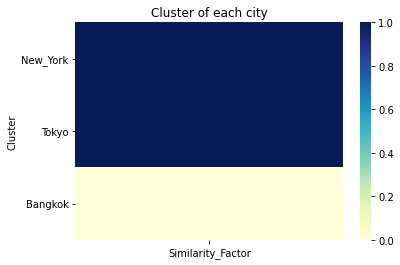

In [87]:
import seaborn as sns
sns.heatmap(similarity.sort_values(by=['Similarity_Factor'], ascending=False), cmap="YlGnBu")
plt.ylabel('Cluster')
plt.title('Cluster of each city')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0);

## Conclusions

Based on what we learned about the clusters and above maps, we can advise the prospective restaurant owner that their consideration of chosing Tokyo and Bangkok in the neighborhoods from USA is great. These are the neighborhoods where gastronomy is well represented and also hotels are frequent. These satisfy the criteria that the location should be in a gastronomical centre and in a location that is easily accessible for tourists and for wealthier local citizens as well. Usually, citizens prefer places with moderate climate situation, having historical sites(this also shown in above analysis), city which is more similar to New York city (considering American Citizen), city having variety of restaurants like continental, sub-continental, language preferably English. So, for a guy living in New York city, if they want some outing so preferable locations might be Bangkok, Tokyo.